## Q1) Total Trips

### 
SELECT COUNT(DISTINCT tripid) FROM trip_details;

### 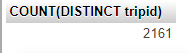

## Q2) Total Drivers

### 
SELECT COUNT(DISTINCT driverid) FROM trips;

### 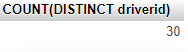

## Q3) Total Earnings

### SELECT SUM(fare) fare FROM trips;

### 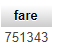

## Q4) Total Completed Trips

### SELECT COUNT(DISTINCT tripid) trips FROM trips;

### 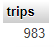

## Q5) Total Searches

### SELECT SUM(searches) searches FROM trip_details;

### 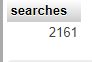

## Q6) Total Searches which got estimate

### SELECT SUM(searches_got_estimate) searches FROM trip_details;

### 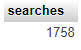

## Q7) Total Searches for quotes

### SELECT SUM(searches_for_quotes) searches FROM trip_details;

### 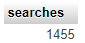

## Q8) Total Searches which got Quotes

### SELECT SUM(searches_got_quotes) searches FROM trip_details;

### 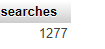

## Q9) Total Driver Cancelled

### SELECT COUNT(*)-SUM(driver_not_cancelled) searches FROM trip_details;

### 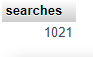

## Q10) Total OTP Entered

### SELECT SUM(otp_entered) searches FROM trip_details;

### 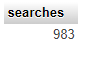

## Q11) Total End Ride

### SELECT SUM(end_ride) rides FROM trip_details;

### 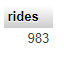

## Q12) Average Distance Per Trip

### SELECT AVG(distance) FROM trips;

### 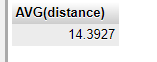

## Q13) Average fare Per Trip

### SELECT AVG(fare) FROM trips;

### 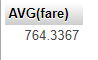

## Q14) Distance Travelled

### SELECT SUM(distance) FROM trips;

### 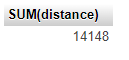

## Q15) Which 2 locations had the most trips ?

### 
SELECT loc_from,loc_to,COUNT(DISTINCT tripid) FROM trips
GROUP BY loc_from, loc_to
ORDER BY COUNT(DISTINCT tripid) DESC;

### 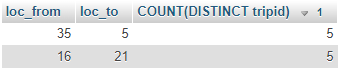

## Q16) Top 5 earnings driver

### 
SELECT driverid,SUM(fare) FROM trips
GROUP BY driverid
ORDER BY SUM(fare) DESC;

### 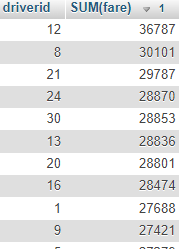

## Q17) Which Duration had more trips ?

### 
SELECT *, rank() over(ORDER BY cnt DESC) rnk FROM
(SELECT duration, COUNT(DISTINCT tripid) cnt FROM trips
GROUP BY duration)b;

### 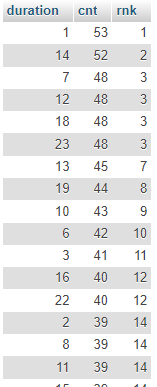
### as you can see that rank had been given according to trips but now we want to filter out the data whose rank is 1

### 
SELECT * FROM
(SELECT *, rank() over(ORDER BY cnt DESC) rnk FROM
(SELECT duration, COUNT(DISTINCT tripid) cnt FROM trips
GROUP BY duration)b)c
WHERE rnk=1;

### 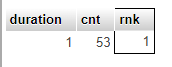
### as you can see that duration 1 had most number of trips i.e. 53

## Q18) Search to estimate rates

### SELECT SUM(searches_got_estimate)*100/ SUM(searches) FROM trip_details;

### 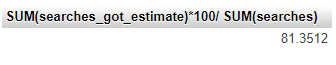

## Q19) Which area got the highest fares, cancellations ?

### 
SELECT * FROM (SELECT*,rank() over(ORDER BY fare DESC) rnk
FROM
(SELECT loc_from, SUM(fare) fare FROM trips
GROUP BY loc_from)b)c
WHERE rnk=1;

### 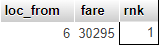
### as we can see that location number 6 had the highest fares

### 
SELECT * FROM (SELECT *, rank() over(ORDER BY can desc) rnk
FROM
(SELECT loc_from, COUNT(*)-SUM(driver_not_cancelled) can
FROM trip_details
GROUP BY loc_from)b)c
WHERE rnk=1;

### 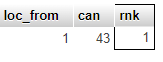
### As you can see that location number 1 had the highest cancellation from driver side

### 
SELECT * FROM (SELECT *,rank() over(ORDER BY can DESC) rnk
FROM
(
SELECT loc_from, COUNT(*)-sum(customer_not_cancelled) can
FROM trip_details
GROUP BY loc_from)b)c
WHERE rnk=1;

### 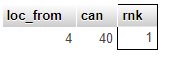
### as you can see that location number 4 had the highest cancellation from customer side